In [1]:
# Load the libraries
import torch
import os
import librosa


from BEATs.Tokenizers import TokenizersConfig, Tokenizers
from BEATs.BEATs import BEATs, BEATsConfig

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import glob

data_folder = "/data/different_bird_songs/"
data = glob.glob(data_folder + "/**/*.mp3", recursive=True)

In [3]:
# Open file and resample at 16000Hz
trs = []
l = []

for afile in data:
    sig, sr = librosa.load(afile, sr = 16000, mono=True)
    sig_t = torch.tensor(sig).unsqueeze(0)
    trs.append(sig_t)
    l.append(afile.split("/")[-2])

/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decora

In [4]:
# load the pre-trained checkpoints
checkpoint = torch.load('/data/BEATs/BEATs_iter3_plus_AS2M.pt')
cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# extract the the audio representation
l_representations = []

for t in trs:
    padding_mask = torch.zeros(t.shape[0], t.shape[1]).bool()
    representation = BEATs_model.extract_features(t, padding_mask=padding_mask)[0]
    # DIMENSIONS are: Batch / Number of labels / Audio encoded in 768 dimension
    l_representations.append(representation[:,-1,:]) # Take only the last dimension as this is the encoded audio

In [5]:
from sklearn.manifold import TSNE

representation = torch.cat(l_representations, dim=0)
representation = representation.detach().numpy()
tsne = TSNE(n_components=2, perplexity=5)
representation_2d = tsne.fit_transform(representation)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

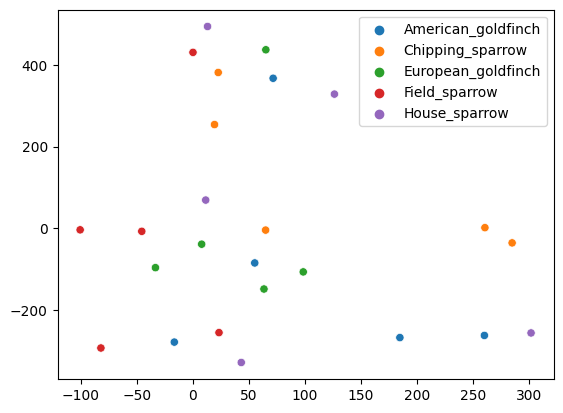

In [6]:
import seaborn as sns
sns.scatterplot(x = representation_2d[:, 0], y = representation_2d[:, 1], hue = l)